In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [9]:
# x - логарифм шансов
x = np.arange(-6, 6, 0.1)
# x

In [5]:
# y - вероятность положительного исхода
y = np.exp(x) / (1 + np.exp(x))

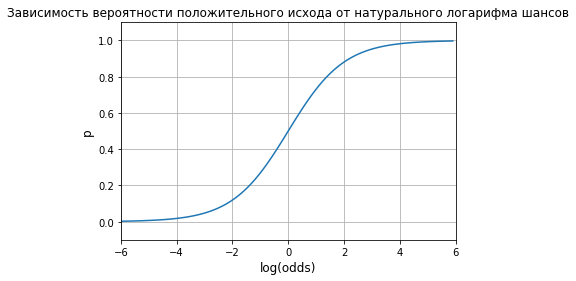

In [7]:
plt.plot(x, y)

plt.grid()
plt.xlim(-6, 6)
plt.ylim(-0.1, 1.1)
plt.title('Зависимость вероятности положительного исхода от натурального логарифма шансов', fontsize=12)
plt.xlabel('log(odds)', fontsize=12)
plt.ylabel('p', fontsize=12)

plt.show()
plt.close()

# Tasks

1. Предположим, мы подбросили монетку 100 раз, и 70 раз выпал орел. Чему равняется натуральный логарифм шансов выпадения решки  
Чтобы не запутаться, давайте в этом задании рассматривать как "успех" - выпадение решки.

In [13]:
o = 70
r = 30
odds = r/o
log_odds = np.log(odds)
log_odds

-0.8472978603872037

Предположим, что мы получили логарифм шансов выпадения решки, равный -1. Тогда вероятность выпадения решки равняется:

In [17]:
p = np.exp(-1) / (1 + np.exp(-1))
p

0.2689414213699951

In [18]:
np.log(24/(41-24))

0.3448404862917296

2. С помощью логистической регрессии без предикторов мы захотели узнать, правда ли, что сдавая Анатолию Дмитриевичу, легче провалить экзамен, чем сдать. В нашей выборке было 50 студентов. Часть из них сдала экзамен (положительный исход), а часть - нет (отрицательный исход). Свободный член нашей регрессии оказался равен -0.8472979. Сколько человек всё-таки сдало экзамен?

In [10]:
log_odds = -0.8472979 # логит равен интерсепту
p = np.exp(log_odds) / (1 + np.exp(log_odds)) # вероятность положительной сдачи эказмена
p 

0.29999999168131286

In [18]:
n = 50
count_p = p * n # сколько человек сдало экзамен
count_p = round(count_p)
count_p

15.0

In [22]:
# Проверка
count_n = n - count_p # сколько человек не сдало экзамен
# count_n
odds = count_p / count_n
np.log(odds)
# Все верно

-0.8472978603872037

# Модель без предикторов

In [55]:
# Датасет Титаника

df = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')

In [58]:
df = df[df.Age.notnull()] # Удалим все пустые значения age
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
df.shape

(714, 12)

In [61]:
# Логистическая регрессия без предикторов (~ 1). Intercept only model

glm_binomial = smf.glm(formula='Survived ~ 1', data=df, family=sm.families.Binomial()).fit()
glm_binomial.summary()

# Intercept - логарифм шансов (шансов выжить)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      713
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -482.26
Date:                Sun, 03 Apr 2022   Deviance:                       964.52
Time:                        12:33:00   Pearson chi2:                     714.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3799      0.076     -4.985      0.000      -0.529      -0.230
==============================================================================
"""

In [62]:
# Получаем модель:
# log(odds) = -0.3799

In [66]:
# Распределение частот ЗП
df.Survived.value_counts()

0    424
1    290
Name: Survived, dtype: int64

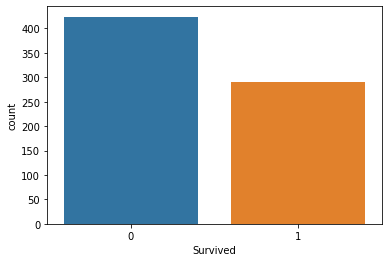

In [71]:
sns.countplot(x='Survived', data=df)

In [72]:
# df.Survived.value_counts()[1] - количество выживших 290
# df.Survived.value_counts()[0] - количество погибших 424
odds = df.Survived.value_counts()[1] / df.Survived.value_counts()[0]
odds

0.6839622641509434

In [73]:
# Логарифм шансов равен Intercept
log_odds = np.log(odds)
log_odds

-0.37985253225143806

In [76]:
# Проверка. Рассчитаем шансы:
odds = np.exp(log_odds)
odds

0.6839622641509434

In [78]:
# Рассчитаем вероятность:
# p = odds / (1 + odds)
p = np.exp(log_odds) / (1 + np.exp(log_odds))
p

0.4061624649859944

In [80]:
# aic - показатель остатков модели.
# Чем он ниже, тем лучше модель (по аналогии с суммой квадратов остатков в линейной регрессии).
glm_binomial.aic

966.5159648555248

# Модель с одним номинативным предиктором

Построим логистическую модель выживаемости на Титанике в зависимости от одной номинативной переменной - пола пассажира.

In [12]:
df = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')
df = df[df.Age.notnull()] # Удалим все пустые значения age
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
# Модель glm из библиотеки statsmodels.formula.api
glm_binomial = smf.glm(formula='Survived ~ C(Sex)', data=df, family=sm.families.Binomial()).fit()
glm_binomial.summary()

# Intercept - логарифм шансов для женщин
# C(Sex)[T.male] - логарифм отношения шансов для мужчин к шансам для женщин

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      712
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -375.35
Date:                Mon, 04 Apr 2022   Deviance:                       750.70
Time:                        14:12:17   Pearson chi2:                     714.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1243      0.144      7.814      0.000       0.842       1.406
C(Sex)[T.male]    -2.4778      0.185    -13.392      0.000      -2.840      -2.115
==================================================================================
"""

In [37]:
# Таблица сопряженности между переменными выжил/не выжил и пол
cont_table = pd.crosstab(df["Survived"], df["Sex"])
cont_table

Sex,female,male
Survived,,
0,64,360
1,197,93


Text(0, 0.5, 'Количество')

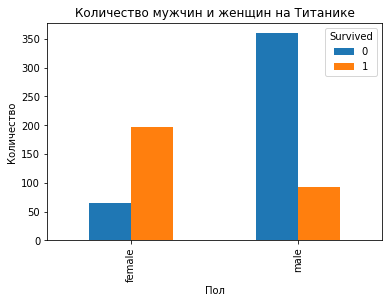

In [38]:
# Визуализировать таблицу сопряженности можно так:
pd.crosstab(df.Sex, df.Survived).plot(kind='bar')
plt.title('Количество мужчин и женщин на Титанике')
plt.xlabel('Пол')
plt.ylabel('Количество')

In [40]:
# cont_table.female[0] - количество погибших женщин
# cont_table.female[1] - количество выживших женщин
odds_female = cont_table.female[1] / cont_table.female[0]
odds_female

3.078125

In [41]:
# Логарифм шансов для женщин - это и есть Intercept
intercept = np.log(odds_female)
intercept

1.1243206453783166

In [42]:
# cont_table.male[0] - количество погибших мужчин
# cont_table.male[1] - количество выживших мужчин
odds_male = cont_table.male[1] / cont_table.male[0]
odds_male

0.25833333333333336

In [44]:
# log(odds_ratio) - это коэффициент C(Sex)[T.male] из summary таблицы glm, 
# логарифм отношения шансов выжить мужчин к шансам выжить женщин

odds_ratio = odds_male / odds_female
print("odds_ratio =", odds_ratio)

log_odds_ratio = np.log(odds_ratio)
print("log_odds_ratio =" ,log_odds_ratio)

odds_ratio = 0.08392554991539763
log_odds_ratio -2.4778251836752165


In [45]:
# Получаем модель:
# log(odds) = 1.1243 - (2.4778 * Sex_male)

# Если предсказываем логарифм шансов для женщин (Sex_male = 0):
# log(odds) = 1.1243 - (2.4778 * 0)
# log(odds) = 1.1243

# Если предсказываем логарифм шансов для мужчин (Sex_male = 1):
# log(odds) = 1.1243 - (2.4778 * 1)
# log(odds) = 1.1243 - 2.4778
# log(odds) -1.3535

log_odds_male = 1.1243 - 2.4778
log_odds_male

-1.3534999999999997

In [46]:
# aic у этой модели ниже, чем у предыдущей, значит эта модель лучше.
glm_binomial.aic

754.7002061466516

# Модель с двумя номинативными предикторами

Построим логистическую модель выживаемости на Титанике в зависимости от двух номинативных переменных - пола пассажира и класса, которым он ехал.

In [2]:
df = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')
df = df[df.Age.notnull()] # Удалим все пустые значения age
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
model = smf.glm(formula="Survived ~ C(Sex) * C(Pclass)", data=df, family=sm.families.Binomial()).fit()
model.summary()

# Intercept      - логарифм шансов для Ж в 1кл
# C(Sex)[T.male] - логарифм отношения шансов для М в 1кл к шансам Ж в 1кл
# C(Pclass)[T.2] - логарифм отношения шансов для Ж во 2кл к шансам Ж в 1кл
# C(Pclass)[T.3] - логарифм отношения шансов для Ж в 3кл к шансам Ж в 1кл
# C(Sex)[T.male]:C(Pclass)[T.2] - разность логарифмов отношения шансов, рассчитанных для М/Ж во 2кл и М/Ж в 1кл
# C(Sex)[T.male]:C(Pclass)[T.3] - разность логарифмов отношения шансов, рассчитанных для М/Ж во 3кл и М/Ж в 1кл

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      708
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -321.14
Date:                Tue, 05 Apr 2022   Deviance:                       642.28
Time:                        20:20:26   Pearson chi2:                     714.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         3.3081      0.588      5.628      0.000       2.156       4.460
C(Sex)[T.male]                   -3.7301      0.622     -5.997      0.000      -4.949      -2.511
C(Pclass)[T.2]                   -0.8804      0.726     -1.213      0.225      -2.303       0.542
C(Pclass)[T.3]                   -3.4653      0.620     -5.585      0.000      -4.681      -2.249
C(Sex)[T.male]:C(Pclass)[T.2]    -0.4204      0.804     -0.523      0.601      -1.997       1.156
C(Sex)[T.male]:C(Pclass)[T.3]     2.1542      0.676      3.185      0.001       0.829       3.480
=================================================================================================
"""

In [60]:
# Таблица сопряженности между переменными выжил/не выжил и классом пассажира для женщин:
cont_table_female = pd.crosstab(df[df["Sex"]=="female"]["Survived"], df["Pclass"])
cont_table_female

Pclass,1,2,3
Survived,,,
0,3,6,55
1,82,68,47


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

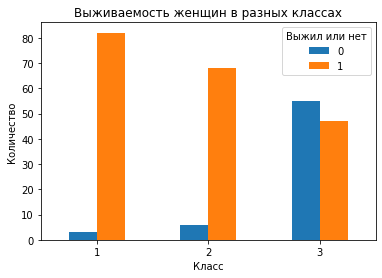

In [25]:
pd.crosstab(df[df["Sex"]=="female"]["Pclass"], df["Survived"]).plot(kind='bar')
plt.title('Выживаемость женщин в разных классах')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.legend(title="Выжил или нет")
plt.xticks(rotation=0)

In [61]:
# Таблица сопряженности между переменными выжил/не выжил и классом пассажира для мужчин:
cont_table_male = pd.crosstab(df[df["Sex"]=="male"]["Survived"], df["Pclass"])
cont_table_male

Pclass,1,2,3
Survived,,,
0,61,84,215
1,40,15,38


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

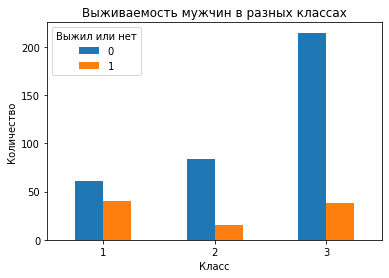

In [26]:
pd.crosstab(df[df["Sex"]=="male"]["Pclass"], df["Survived"]).plot(kind='bar')
plt.title('Выживаемость мужчин в разных классах')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.legend(title="Выжил или нет")
plt.xticks(rotation=0)

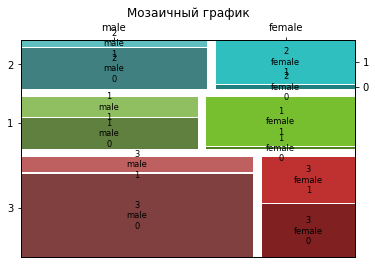

In [58]:
# График сопряженности между классом пассажира, полом и переменной выжил/не выжил.

from statsmodels.graphics.mosaicplot import mosaic

mosaic(df, ['Pclass', 'Sex', 'Survived'], title='Мозаичный график', horizontal=0, gap=0.04)
plt.show()

In [75]:
cont_table_female

Pclass,1,2,3
Survived,,,
0,3,6,55
1,82,68,47


In [76]:
# Шансы выжить для женщин из 1 класса
odds_female_pc1 = cont_table_female[1][1] / cont_table_female[1][0] # отношение "успехов" (сколько выжило) к 
                                                                    # "неудачам" (сколько не выжило) в 1 классе
odds_female_pc1

27.333333333333332

In [77]:
# Intercept
intercept = np.log(odds_female_pc1)
intercept

3.3081069585961433

In [78]:
cont_table_male

Pclass,1,2,3
Survived,,,
0,61,84,215
1,40,15,38


In [79]:
odds_male_pc1 = cont_table_male[1][1] / cont_table_male[1][0]
odds_male_pc1

0.6557377049180327

In [80]:
# Это значение C(Sex)[T.male]
SexMale = np.log(odds_male_pc1 / odds_female_pc1)
SexMale

-3.7301013686555184

In [81]:
odds_female_pc2 = cont_table_female[2][1] / cont_table_female[2][0] # отношение "успехов" (сколько выжило) к 
                                                                    # "неудачам" (сколько не выжило) во 2 классе
odds_female_pc2

11.333333333333334

In [84]:
# Это значение C(Pclass)[T.2]
PclassSecond = np.log(odds_female_pc2 / odds_female_pc1)
PclassSecond

-0.8803587226480917

In [83]:
odds_female_pc3 = cont_table_female[3][1] / cont_table_female[3][0] # отношение "успехов" (сколько выжило) к 
                                                                    # "неудачам" (сколько не выжило) в 3 классе
odds_female_pc3

0.8545454545454545

In [85]:
# Это значение C(Pclass)[T.3]
PclassThird = np.log(odds_female_pc3 / odds_female_pc1)
PclassThird

-3.4652925421185556

In [86]:
odds_male_pc2 = cont_table_male[2][1] / cont_table_male[2][0]
odds_male_pc2

0.17857142857142858

In [87]:
# Это значение C(Sex)[T.male]:C(Pclass)[T.2]
SexMale_PclassSecond = np.log(odds_male_pc2 / odds_female_pc2) - np.log(odds_male_pc1 / odds_female_pc1)
SexMale_PclassSecond

-0.42041346503363686

In [88]:
odds_male_pc3 = cont_table_male[3][1] / cont_table_male[3][0]
odds_male_pc3

0.17674418604651163

In [89]:
# Это значение C(Sex)[T.male]:C(Pclass)[T.3]
SexMale_PclassThird = np.log(odds_male_pc3 / odds_female_pc3) - np.log(odds_male_pc1 / odds_female_pc1)
SexMale_PclassThird

2.154235083776654

In [90]:
# Получаем модель:
# log(odds) = 3.3081 - (3.7301 * Sex_male) - (0.8804 * Pclass2) - (3.4653 * Pclass3) - (0.4204 * Sex_male * Pclass2) + (2.1542 * Sex_male * Pclass3)

# Если предсказываем логарифм шансов для Ж в 1кл (Sex_male = 0, Pclass2 = 0, Pclass3 = 0):
# log(odds) = 3.3081 - (3.7301 * 0) - (0.8804 * 0) - (3.4653 * 0) - (0.4204 * 0 * 0) + (2.1542 * 0 * 0)
# log(odds) = 3.3081

# Если предсказываем логарифм шансов для М в 1кл (Sex_male = 1, Pclass2 = 0, Pclass3 = 0):
# log(odds) = 3.3081 - (3.7301 * 1) - (0.8804 * 0) - (3.4653 * 0) - (0.4204 * 1 * 0) + (2.1542 * 1 * 0)
# log(odds) = 3.3081 - 3.7301
# log(odds) = -0.422

log_odds_male = 3.3081 - 3.7301
log_odds_male

-0.42200000000000015

In [91]:
# Если предсказываем логарифм шансов для Ж во 2кл (Sex_male = 0, Pclass2 = 1, Pclass3 = 0):
# log(odds) = 3.3081 - (3.7301 * 0) - (0.8804 * 1) - (3.4653 * 0) - (0.4204 * 0 * 1) + (2.1542 * 0 * 0)
# log(odds) = 3.3081 - 0.8804
# log(odds) = 2.4277

log_odds_female_pc2 = 3.3081 - 0.8804
log_odds_female_pc2

2.4277

In [92]:
# Если предсказываем логарифм шансов для Ж в 3кл (Sex_male = 0, Pclass2 = 0, Pclass3 = 1):
# log(odds) = 3.3081 - (3.7301 * 0) - (0.8804 * 0) - (3.4653 * 1) - (0.4204 * 0 * 0) + (2.1542 * 0 * 1)
# log(odds) = 3.3081 - 3.4653
# log(odds) = -0.1572

log_odds_female_pc3 = 3.3081 - 3.4653
log_odds_female_pc3

-0.1572

In [93]:
# Если предсказываем логарифм шансов для М во 2кл (Sex_male = 1, Pclass2 = 1, Pclass3 = 0):
# log(odds) = 3.3081 - (3.7301 * 1) - (0.8804 * 1) - (3.4653 * 0) - (0.4204 * 1 * 1) + (2.1542 * 1 * 0)
# log(odds) = 3.3081 - 3.7301 - 0.8804 - 0.4204
# log(odds) = -1.7228

log_odds_male_pc2 = 3.3081 - 3.7301 - 0.8804 - 0.4204
log_odds_male_pc2

-1.7227999999999999

In [94]:
# Если предсказываем логарифм шансов для М в 3кл (Sex_male = 1, Pclass2 = 0, Pclass3 = 1):
# log(odds) = 3.3081 - (3.7301 * 1) - (0.8804 * 0) - (3.4653 * 1) - (0.4204 * 1 * 0) + (2.1542 * 1 * 1)
# log(odds) = 3.3081 - 3.7301 - 3.4653 + 2.1542
# log(odds) = -1.7331

log_odds_male_pc3 = 3.3081 - 3.7301 - 3.4653 + 2.1542
log_odds_male_pc3

-1.7331000000000003

In [96]:
# aic у этой модели ниже, чем у двух предыдущих, значит эта модель лучше
model.aic

654.2750443468178

# Комбинация предикторов разного типа

Построим логистическую модель выживаемости на Титанике в зависимости от **двух номинативных предикторов** - пола пассажира и класса, которым он ехал - и в зависимости от **одного количественного предиктора** - возраста.

In [31]:
df = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')
df = df[df.Age.notnull()] # Удалим все пустые значения age
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
model = smf.glm(formula='Survived ~ C(Sex) + C(Pclass) + Age', data=df, family=sm.families.Binomial()).fit()
model.summary()

# Intercept - логарифм шансов для Ж в 1кл при условии, что их возраст равен нулю.
# Age - коэффициент при возрасте показывает, на сколько изменяется логарифм шансов для базового уровня 
# при единичном изменении возраста.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      709
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.64
Date:                Wed, 06 Apr 2022   Deviance:                       647.28
Time:                        21:09:56   Pearson chi2:                     767.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7770      0.401      9.416      0.000       2.991       4.563
C(Sex)[T.male]    -2.5228      0.207    -12.164      0.000      -2.929      -2.116
C(Pclass)[T.2]    -1.3098      0.278     -4.710      0.000      -1.855      -0.765
C(Pclass)[T.3]    -2.5806      0.281     -9.169      0.000      -3.132      -2.029
Age               -0.0370      0.008     -4.831      0.000      -0.052      -0.022
==================================================================================
"""

In [34]:
# Получаем модель:
# log(odds) = 3.7770 - (2.5228 * Sex_male) - (1.3098 * Pclass2) - (2.5806 * Pclass3) - (0.0370 * Age)

# Если предсказываем логарифм шансов для Ж в 1кл в возрасте 20 лет:
# log(odds) = 3.7770 - (2.5228 * 0) - (1.3098 * 0) - (2.5806 * 0) - (0.0370 * 20)
# log(odds) = 3.7770 - (0.0370 * 20)
# log(odds) = 3.037

3.7770 - (0.0370 * 20)

3.037

In [36]:
# Модель без учета возраста cо взаимодействием предикторов была немного лучше.
model.aic

657.2831255018241

## Tasks

Изучалось новое лекарство от мигрени. Испытуемые были разделены на три группы: первой группе испытуемых не давали ничего, вторая группа получала плацебо, а третья группа получала новое лекарство. Мы воспользовались логистической регрессией, чтобы понять, помогло ли лекарство снять головную боль. Наша модель выглядит следующим образом: 

Эффект(1=больпрошла;0=непрошла)∼Пол(Female/Male)∗Условие(None/Placebo/Treatment) 

На рисунке в виде мозаичного графика изображено распределение испытуемых по итогам исследования.  Ваша задача - на основе этого рисунка предположить, какие коэффициенты получили разные предикторы модели и их взаимодействия.

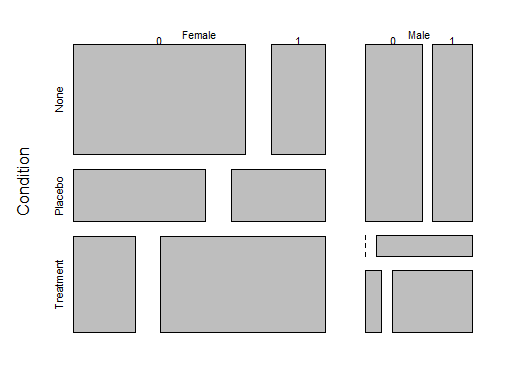

In [4]:
# Effect = intercept + 0.8*SexMale + B2*ConditionPlacebo + B3*ConditionTreatment + 
#                    + B4*SexMale:ConditionPlacebo + B5*SexMale:ConditionTreatment

Все значения "удачных" и "неудачных" исходов ниже приблизительные, т.к. у нас нет данных.

In [5]:
# intercept = log(odds_female_none) = log(f_n_pos / f_n_neg)
f_n_pos = 1.5
f_n_neg = 5
odds_female_none = f_n_pos / f_n_neg
print("odds_female_none =", odds_female_none)
intercept = np.log(odds_female_none)
print("intercept =", intercept)

odds_female_none = 0.3
intercept = -1.2039728043259361


In [8]:
# SexMale = log(odds_male_none / odds_female_none)
m_n_pos = 1
m_n_neg = 1.5
odds_male_none = m_n_pos / m_n_neg
print("odds_male_none =", odds_male_none)
SexMale = np.log(odds_male_none / odds_female_none)
print("B1 = ", SexMale)

odds_male_none = 0.6666666666666666
B1 =  0.7985076962177716


In [12]:
# CondiitonPLacebo = log(odds_female_placebo / odds_female_none)
f_p_pos = 2.5
f_p_neg = 3.5
odds_female_placebo = f_p_pos / f_p_neg
print("odds_female_placebo =", odds_female_placebo)
CondiitonPLacebo = np.log(odds_female_placebo / odds_female_none)
print("B2 = ", CondiitonPLacebo)

odds_female_placebo = 0.7142857142857143
B2 =  0.8675005677047231


In [17]:
# CondiitonTreatment = log(odds_female_treatment / odds_female_none)
f_t_pos = 4.6
f_t_neg = 1.7
odds_female_treatment = f_t_pos / f_t_neg
print("odds_female_treatment =", odds_female_treatment)
CondiitonTreatment = np.log(odds_female_treatment / odds_female_none)
print("B3 = ", CondiitonTreatment)

odds_female_treatment = 2.705882352941176
B3 =  2.199400856758815


In [16]:
# SexMale:ConditionPlacebo = log(odds_male_placebo / odds_female_placebo) - log(odds_male_none / odds_female_none)
m_p_pos = 2.8
m_p_neg = 0.0000001
odds_male_placebo = m_p_pos / m_p_neg
print("odds_male_placebo =", odds_male_placebo)
SexMale_placebo = np.log(odds_male_placebo / odds_female_placebo)
print("log(odds_male_placebo / odds_female_placebo) = ", SexMale_placebo)
print("log(odds_male_none / odds_female_none) =", SexMale)
SexMale_ConditionPlacebo = SexMale_placebo - SexMale
print("B4 = ", SexMale_ConditionPlacebo)

odds_male_placebo = 28000000.0
log(odds_male_placebo / odds_female_placebo) =  17.48418730476069
log(odds_male_none / odds_female_none) = 0.7985076962177716
B4 =  16.68567960854292


In [24]:
# SexMale:ConditionTreatment = log(odds_male_treatment / odds_female_treatment) - log(odds_male_none / odds_female_none)
m_t_pos = 2.4
m_t_neg = 0.5
odds_male_treatment = m_t_pos / m_t_neg
print("odds_male_treatment =", odds_male_treatment)
SexMale_treatment = np.log(odds_male_treatment / odds_female_treatment)
print("log(odds_male_treatment / odds_female_treatment) = ", SexMale_treatment)
print("log(odds_male_none / odds_female_none) =", SexMale)
SexMale_ConditionTreatment = SexMale_treatment - SexMale
print("B5 = ", SexMale_ConditionTreatment)

odds_male_treatment = 4.8
log(odds_male_treatment / odds_female_treatment) =  0.5731878654809665
log(odds_male_none / odds_female_none) = 0.7985076962177716
B5 =  -0.22531983073680517


In [25]:
# Итого (все значения приблизительные):
# Effect = -1.15 + 0.8*SexMale + 0.82*ConditionPlacebo + 2.13*ConditionTreatment + 
#                    + 16.11*SexMale:ConditionPlacebo - 0.17*SexMale:ConditionTreatment

Рассчитаем с помощью полученной формулы вероятность снять головную боль после приёма настоящего лекарства мужчиной.

In [30]:
# Effect = log(odds) = -1.15 + 0.8*1 + 0.82*0 + 2.13*1 + 16.11*0 - 0.17*1
# p = exp(log(odds)) / (1 + exp(log(odds)))

log_odds = -1.15 + 0.8*1 + 0.82*0 + 2.13*1 + 16.11*0 - 0.17*1
print("log_odds =", log_odds)
p = np.exp(log_odds) / (1 + np.exp(log_odds))
print("Вероятность снять головную боль после приёма лекарства мужчиной:", p)

log_odds = 1.61
Вероятность снять головную боль после приёма лекарства мужчиной: 0.8334113864245404
